In [1]:
# import dependencies
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mapclassify as mc
from scipy.stats import linregress

In [2]:
base_url = "https://data.cms.gov/data-api/v1/dataset/b736b4bd-3020-4343-b3dc-0010082ccc77/data?"

In [3]:
# To retrieve large json data
json_data = []  # To store all the data

# Set up pagination
page = 0
page_size = 5000  # Adjust the page size 

while True:
    query_url = f"{base_url}size={page_size}&offset={page}"
    response = requests.get(query_url).json()
    json_data.extend(response)

    if len(json_data) < page:
        # Break the loop if all data has been retrieved
        break

    page += page_size


In [4]:
# Convert data into a Pandas DataFrame
mcc_df = pd.DataFrame(json_data)
mcc_df

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_MCC,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.566,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.573
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.293,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
44971,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831
44972,County,Wyoming : Weston,56045,65+,All,All,0 to 1,,,,,
44973,County,Wyoming : Weston,56045,65+,All,All,2 to 3,,,,,
44974,County,Wyoming : Weston,56045,65+,All,All,4 to 5,,,,,


In [5]:
mcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Bene_Geo_Lvl              44976 non-null  object
 1   Bene_Geo_Desc             44976 non-null  object
 2   Bene_Geo_Cd               44976 non-null  object
 3   Bene_Age_Lvl              44976 non-null  object
 4   Bene_Demo_Lvl             44976 non-null  object
 5   Bene_Demo_Desc            44976 non-null  object
 6   Bene_MCC                  44976 non-null  object
 7   Prvlnc                    44976 non-null  object
 8   Tot_Mdcr_Stdzd_Pymt_PC    44976 non-null  object
 9   Tot_Mdcr_Pymt_PC          44976 non-null  object
 10  Hosp_Readmsn_Rate         44976 non-null  object
 11  ER_Visits_Per_1000_Benes  44976 non-null  object
dtypes: object(12)
memory usage: 4.1+ MB


In [6]:
# Rename all the columns to descriptive columns
mcc_df = mcc_df.rename(columns = {
    "Bene_Geo_Lvl": "Beneficiary_Geographic_Level",
    "Bene_Geo_Desc" : "Beneficiary_Geographic_Description",
    "Bene_Geo_Cd" : "Beneficiary_Geographic_Code",
    "Bene_Age_Lvl" : "Beneficiary_Age_Level",
    "Bene_Demo_Lvl" : "Beneficiary_Demographic_Level",
    "Bene_Demo_Desc" : "Beneficiary_Demographic_Description",
    "Bene_MCC" : "Beneficiary_Multiple_Chronic_Condition_Group",
    "Prvlnc" : "Prevalence",
    "Tot_Mdcr_Stdzd_Pymt_PC" : "Total_Medicare_Standardized_Per_Capita_Spending",
    "Tot_Mdcr_Pymt_PC" : "Total_Medicare_Per_Capita_Spending",
    "Hosp_Readmsn_Rate" : "Hospital_Readmission_Rate",
    "ER_Visits_Per_1000_Benes" : "Emergency_Room_Visits_per_1,000_Beneficiaries",
})
mcc_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.566,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.573
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.293,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
44971,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831
44972,County,Wyoming : Weston,56045,65+,All,All,0 to 1,,,,,
44973,County,Wyoming : Weston,56045,65+,All,All,2 to 3,,,,,
44974,County,Wyoming : Weston,56045,65+,All,All,4 to 5,,,,,


In [7]:
# changing the datatype from object to numeric (float as default)
# x[['D', 'L']] = x[['D', 'L']].apply(pd.to_numeric, errors='coerce')
mcc_df[["Prevalence","Total_Medicare_Standardized_Per_Capita_Spending", \
               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
              "Emergency_Room_Visits_per_1,000_Beneficiaries"]] = \
mcc_df[["Prevalence","Total_Medicare_Standardized_Per_Capita_Spending", \
               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
              "Emergency_Room_Visits_per_1,000_Beneficiaries"]].apply(pd.to_numeric, errors='coerce')

In [8]:
mcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     44976 non-null  object 
 1   Beneficiary_Geographic_Description               44976 non-null  object 
 2   Beneficiary_Geographic_Code                      44976 non-null  object 
 3   Beneficiary_Age_Level                            44976 non-null  object 
 4   Beneficiary_Demographic_Level                    44976 non-null  object 
 5   Beneficiary_Demographic_Description              44976 non-null  object 
 6   Beneficiary_Multiple_Chronic_Condition_Group     44976 non-null  object 
 7   Prevalence                                       41260 non-null  float64
 8   Total_Medicare_Standardized_Per_Capita_Spending  41232 non-null  float64
 9   Total_Medicare_Per_Capita_Sp

In [9]:
mcc_df.head(1623)

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
1618,State,Montana,30,All,Sex,Male,4 to 5,0.1543,12460.3594,13218.7885,0.1136,947.8849
1619,State,Montana,30,All,Sex,Male,6+,0.0969,29512.5685,31675.0620,0.1983,2033.8093
1620,National,National,,65+,All,All,0 to 1,0.2990,1864.5824,1890.0697,0.0448,125.2986
1621,National,National,,65+,All,All,2 to 3,0.2957,5266.8693,5451.3164,0.0612,324.0907


In [10]:
mcc_df.head(1681)

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
1676,National,National,,All,Sex,Male,0 to 1,0.3355,1730.8044,1755.7813,0.0627,172.6146
1677,National,National,,All,Sex,Male,2 to 3,0.2753,5548.3930,5760.2014,0.0817,398.0146
1678,National,National,,All,Sex,Male,4 to 5,0.2175,10817.7796,11432.3795,0.1145,710.6822
1679,National,National,,All,Sex,Male,6+,0.1717,30891.4388,33438.8815,0.2391,1948.2550


## Data can be analyzed at National, State and County level

### Observing the dataset at National level

In [11]:
# Make a dataframe based on National
mcc_national_df = mcc_df.loc[mcc_df["Beneficiary_Geographic_Level"] == "National"]
mcc_national_df = mcc_national_df.reset_index(drop=True)
mcc_national_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,National,National,,65+,All,All,0 to 1,0.2990,1864.5824,1890.0697,0.0448,125.2986
1,National,National,,65+,All,All,2 to 3,0.2957,5266.8693,5451.3164,0.0612,324.0907
2,National,National,,65+,All,All,4 to 5,0.2263,10178.9293,10714.2818,0.0941,633.0037
3,National,National,,65+,All,All,6+,0.1790,28548.8447,30688.9773,0.2134,1747.8357
4,National,National,,65+,Dual Status,Medicare Only,0 to 1,0.3167,1867.0045,1887.5742,0.0434,118.4731
...,...,...,...,...,...,...,...,...,...,...,...,...
115,National,National,,All,Race,non-Hispanic Black,6+,0.2086,35347.0002,38682.4957,0.2745,2624.5654
116,National,National,,All,Race,non-Hispanic White,0 to 1,0.3093,2085.4058,2096.6901,0.0538,168.9387
117,National,National,,All,Race,non-Hispanic White,2 to 3,0.2977,5633.3032,5788.3665,0.0695,387.1976
118,National,National,,All,Race,non-Hispanic White,4 to 5,0.2203,10660.3522,11131.0462,0.1012,716.0436


### Observing the dataset at State level

In [12]:
# summary statistics of national level data
mcc_national_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.250002,13047.275507,14132.265408,0.133844,1052.779237
std,0.071173,11966.192975,13247.849338,0.078122,943.700769
min,0.110300,1135.560800,1183.622100,0.042600,83.381900
25%,0.189875,3551.087925,3905.361700,0.070525,367.282600
50%,0.248700,8422.653600,9256.054150,0.106500,686.919950
75%,0.296650,18731.692125,21206.373850,0.194650,1643.022400
max,0.437800,41630.397800,48584.000800,0.330000,3853.589800


In [13]:
# Make a dataframe based on State
mcc_state_df = mcc_df.loc[mcc_df["Beneficiary_Geographic_Level"] == "State"]
mcc_state_df = mcc_state_df.reset_index(drop=True)
mcc_state_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,State,Unknown,,All,Race,non-Hispanic Black,6+,NaN,NaN,NaN,NaN,NaN
6476,State,Unknown,,All,Race,non-Hispanic White,0 to 1,NaN,NaN,NaN,NaN,NaN
6477,State,Unknown,,All,Race,non-Hispanic White,2 to 3,NaN,NaN,NaN,NaN,NaN
6478,State,Unknown,,All,Race,non-Hispanic White,4 to 5,NaN,NaN,NaN,NaN,NaN


In [14]:
# Drop rows with blanks in the specified column
columns_to_drop = ["Beneficiary_Geographic_Description", "Prevalence", \
                   "Total_Medicare_Standardized_Per_Capita_Spending", \
                   "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
                   "Emergency_Room_Visits_per_1,000_Beneficiaries"]

mcc_state_df.dropna(subset=columns_to_drop, inplace=True)
mcc_state_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
6411,State,Wyoming,56,All,Race,Native American,6+,0.1072,35746.1757,40410.3558,0.2094,3364.3411
6416,State,Wyoming,56,All,Race,non-Hispanic White,0 to 1,0.4793,2117.9419,2214.8831,0.0723,178.6750
6417,State,Wyoming,56,All,Race,non-Hispanic White,2 to 3,0.2785,6695.6947,7334.2329,0.0721,516.3241
6418,State,Wyoming,56,All,Race,non-Hispanic White,4 to 5,0.1507,13385.4566,15022.8212,0.0962,997.6550


In [15]:
# summary statistics of State level data
mcc_state_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000
mean,0.243221,13931.702603,14915.765742,0.134526,1178.982470
std,0.088610,12050.340717,13355.111875,0.083206,1021.242333
min,0.046900,559.386600,676.290700,0.000000,72.065700
25%,0.178900,4924.984900,4901.760575,0.070325,392.488850
50%,0.237300,9765.524750,10005.796250,0.108900,801.373700
75%,0.294100,26795.775150,27550.260600,0.202700,1774.952050
max,0.601900,61614.153100,69369.132200,0.541000,6016.393400


In [16]:
# Write State df to a csv file
mcc_state_df.to_csv('mcc_state.csv', index = False)

In [17]:
# mcc_state_df.pivot(columns="Beneficiary_Geographic_Description", index="Beneficiary_Age_Level", values="Prevalence")

In [18]:
# Filtering for 'All' at state level
mcc_df_state_all_df = mcc_state_df.loc[(mcc_state_df["Beneficiary_Age_Level"] == "All") \
                                       & (mcc_state_df["Beneficiary_Demographic_Level"] == "All") \
                                       & (mcc_state_df["Beneficiary_Geographic_Level"] == "State"), :]
mcc_df_state_all_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
24,State,Alabama,01,All,All,All,0 to 1,0.2621,2091.9398,1887.2548,0.0590,226.9723
25,State,Alabama,01,All,All,All,2 to 3,0.2874,5545.1296,5039.7988,0.0814,439.7410
26,State,Alabama,01,All,All,All,4 to 5,0.2481,10383.4301,9451.8262,0.1098,724.2161
27,State,Alabama,01,All,All,All,6+,0.2024,27980.7920,25491.2797,0.2212,1851.6498
84,State,Alaska,02,All,All,All,0 to 1,0.4805,1822.9275,2202.1402,0.0535,163.5787
...,...,...,...,...,...,...,...,...,...,...,...,...
3147,State,Wisconsin,55,All,All,All,6+,0.1402,27609.4522,29388.6248,0.2136,2106.1366
3204,State,Wyoming,56,All,All,All,0 to 1,0.4806,2081.4474,2174.3732,0.0716,181.1350
3205,State,Wyoming,56,All,All,All,2 to 3,0.2781,6656.7032,7278.8866,0.0708,531.2221
3206,State,Wyoming,56,All,All,All,4 to 5,0.1503,13389.3162,15018.1410,0.0959,1022.7305


In [19]:
# aggregate across all multiple chronic conditions counts, get mean for some columns
#mcc_df_totals_for_states_df[["Prevalence","Hospital_Readmission_Rate","Emergency_Room_Visits_per_1,000_Beneficiaries"]] = 
mcc_df_totals_for_states_df = mcc_df_state_all_df.groupby("Beneficiary_Geographic_Description")["Prevalence", "Hospital_Readmission_Rate", "Emergency_Room_Visits_per_1,000_Beneficiaries"].mean()
mcc_df_totals_for_states_df
#mcc_df_state_all_df.mean()

/var/folders/_b/dhw3ll9x6jz32nhf4_dnf7_h0000gp/T/ipykernel_48035/1075138496.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mcc_df_totals_for_states_df = mcc_df_state_all_df.groupby("Beneficiary_Geographic_Description")["Prevalence", "Hospital_Readmission_Rate", "Emergency_Room_Visits_per_1,000_Beneficiaries"].mean()


,Prevalence,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
Beneficiary_Geographic_Description,,,
Alabama,0.250000,0.117850,810.644800
Alaska,0.250000,0.109375,996.158075
Arizona,0.250000,0.108350,779.631450
Arkansas,0.250000,0.120875,877.471125
California,0.249975,0.118900,792.351925
Colorado,0.250000,0.104100,927.395250
Connecticut,0.250025,0.118925,872.907150
Delaware,0.250000,0.107050,752.200925
District of Columbia,0.250000,0.154900,1164.459025


In [20]:
# get totals for others
mcc_df_totals_for_states_df[["Total_Medicare_Standardized_Per_Capita_Spending",\
                             "Total_Medicare_Per_Capita_Spending"]] = \
mcc_df_state_all_df.groupby("Beneficiary_Geographic_Description")["Total_Medicare_Standardized_Per_Capita_Spending",\
                                             "Total_Medicare_Per_Capita_Spending"].sum()
mcc_df_totals_for_states_df

/var/folders/_b/dhw3ll9x6jz32nhf4_dnf7_h0000gp/T/ipykernel_48035/4180939418.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mcc_df_state_all_df.groupby("Beneficiary_Geographic_Description")["Total_Medicare_Standardized_Per_Capita_Spending",\


,Prevalence,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending
Beneficiary_Geographic_Description,,,,,
Alabama,0.250000,0.117850,810.644800,46001.2915,41870.1595
Alaska,0.250000,0.109375,996.158075,49365.1039,68164.6995
Arizona,0.250000,0.108350,779.631450,47904.0346,51545.0677
Arkansas,0.250000,0.120875,877.471125,48909.9955,45445.8171
California,0.249975,0.118900,792.351925,48356.1795,61124.0451
Colorado,0.250000,0.104100,927.395250,52309.1079,55701.0682
Connecticut,0.250025,0.118925,872.907150,47660.2124,57219.9539
Delaware,0.250000,0.107050,752.200925,44704.2124,49194.4825
District of Columbia,0.250000,0.154900,1164.459025,53425.4078,63167.7432


<Axes: xlabel='State', ylabel='Hospital Readmission Rate'>

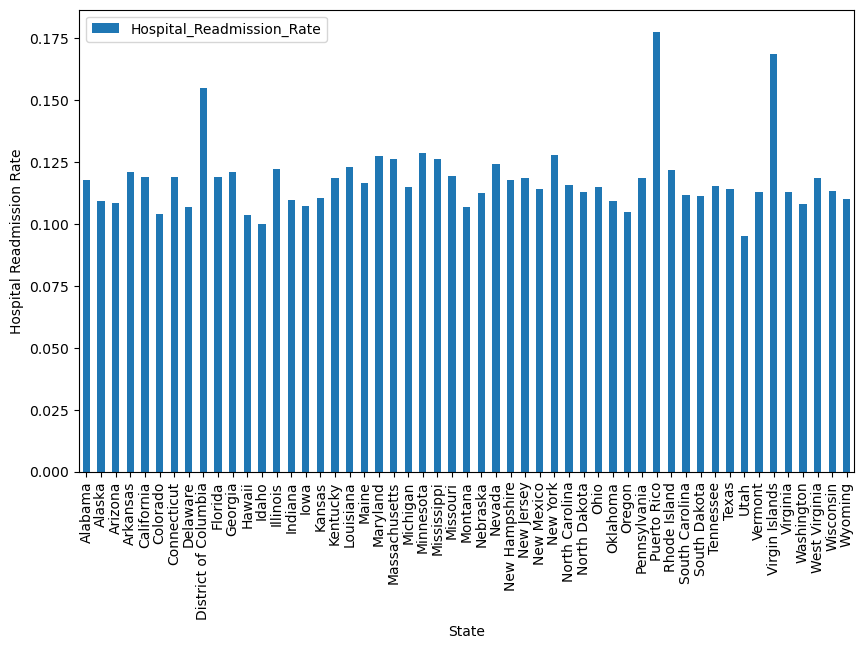

In [21]:
mcc_df_totals_for_states_df[["Hospital_Readmission_Rate"]].plot.bar(xlabel="State", 
                                                                    ylabel="Hospital Readmission Rate", 
                                                                    figsize=(10,6))

In [22]:
#DEMO 2:  Rather than getting everyone, group by state then age

mcc_df_state_by_age_df = mcc_state_df.loc[(mcc_state_df["Beneficiary_Demographic_Level"] == "All") \
                                       & (mcc_state_df["Beneficiary_Age_Level"] != "All") \
                                       & (mcc_state_df["Beneficiary_Geographic_Level"] == "State"), :]
mcc_df_state_by_age_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
12,State,Alabama,01,<65,All,All,0 to 1,0.3656,2291.9199,2062.6122,0.0713,442.8174
...,...,...,...,...,...,...,...,...,...,...,...,...
3183,State,Wyoming,56,65+,All,All,6+,0.0910,32009.0273,36822.7522,0.1973,2104.2539
3192,State,Wyoming,56,<65,All,All,0 to 1,0.5030,2800.8182,2843.8739,0.1293,411.8981
3193,State,Wyoming,56,<65,All,All,2 to 3,0.2634,8358.9488,8894.3008,0.0935,1168.5543
3194,State,Wyoming,56,<65,All,All,4 to 5,0.1427,17460.0881,18774.5460,0.1247,1993.2349


In [23]:
mcc_df_state_by_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 3195
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     414 non-null    object 
 1   Beneficiary_Geographic_Description               414 non-null    object 
 2   Beneficiary_Geographic_Code                      414 non-null    object 
 3   Beneficiary_Age_Level                            414 non-null    object 
 4   Beneficiary_Demographic_Level                    414 non-null    object 
 5   Beneficiary_Demographic_Description              414 non-null    object 
 6   Beneficiary_Multiple_Chronic_Condition_Group     414 non-null    object 
 7   Prevalence                                       414 non-null    float64
 8   Total_Medicare_Standardized_Per_Capita_Spending  414 non-null    float64
 9   Total_Medicare_Per_Capita_Spend

In [24]:
# aggregate across all multiple chronic conditions counts, get mean for some columns
mcc_df_state_by_age_aggregate_example_df = mcc_df_state_by_age_df.groupby(["Beneficiary_Geographic_Description","Beneficiary_Age_Level"])["Emergency_Room_Visits_per_1,000_Beneficiaries"].mean()
mcc_df_state_by_age_aggregate_example_df

Beneficiary_Geographic_Description  Beneficiary_Age_Level
Alabama                             65+                       651.554550
                                    <65                      1453.301850
Alaska                              65+                       852.459750
                                    <65                      1833.467725
Arizona                             65+                       712.020200
                                                                ...     
West Virginia                       <65                      1413.352300
Wisconsin                           65+                       775.544675
                                    <65                      1687.302125
Wyoming                             65+                       898.319650
                                    <65                      1826.819500
Name: Emergency_Room_Visits_per_1,000_Beneficiaries, Length: 106, dtype: float64

<Axes: xlabel='Beneficiary_Geographic_Description,Beneficiary_Age_Level'>

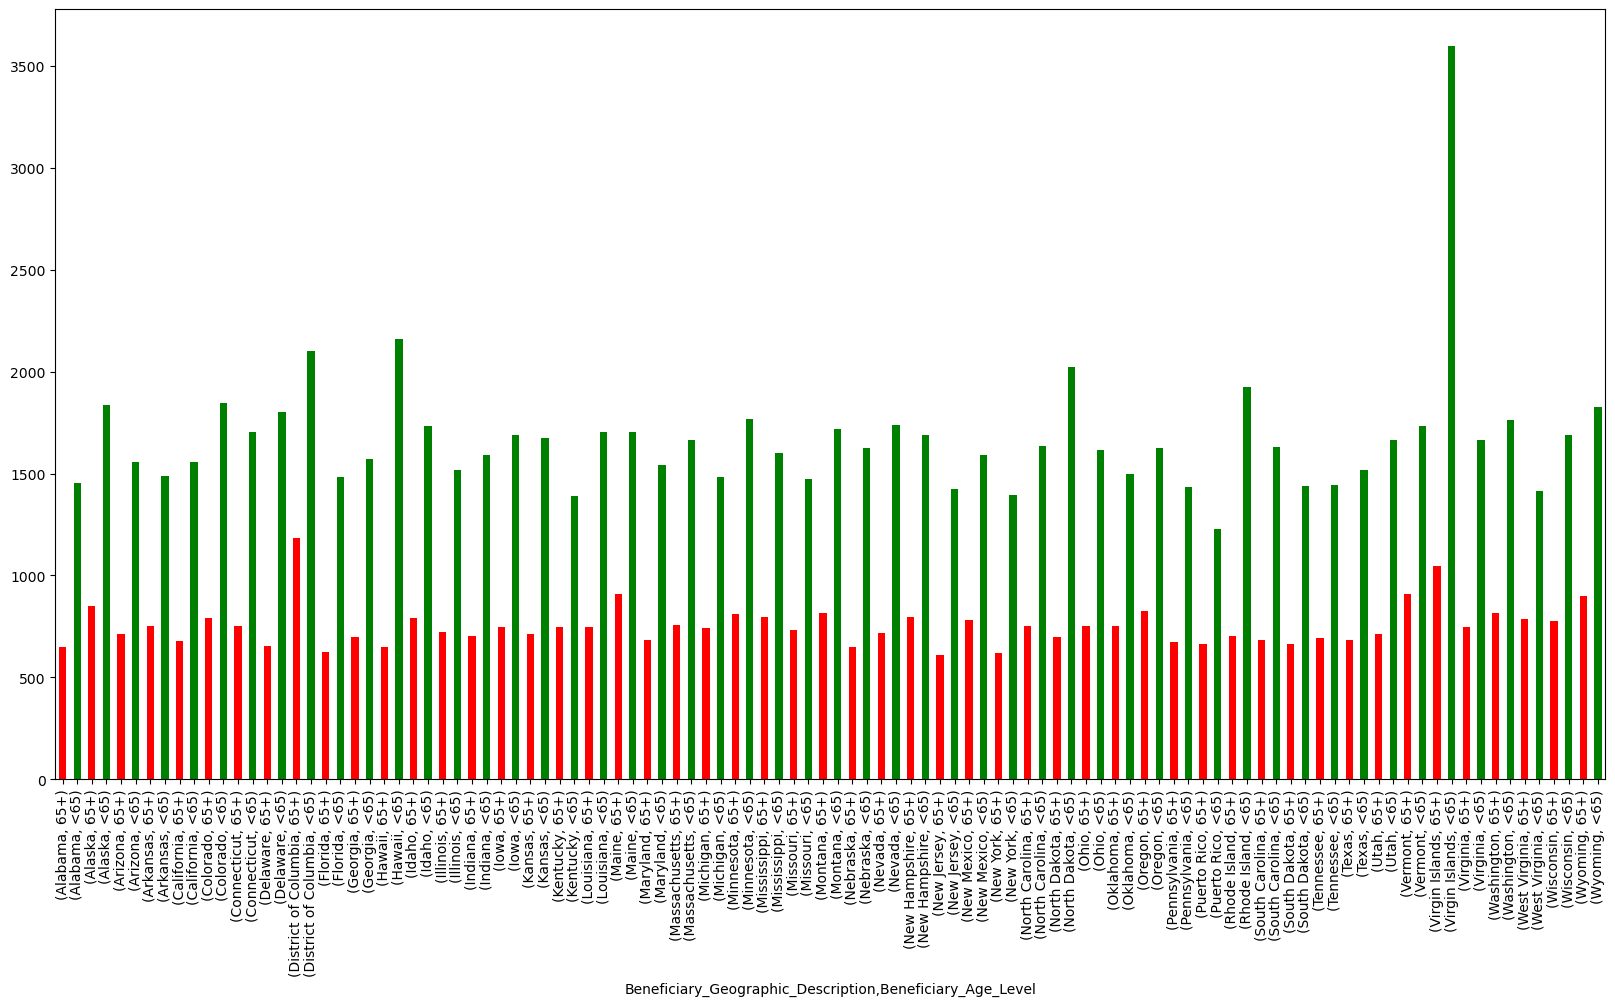

In [25]:
# get totals for others
mcc_df_state_by_age_aggregate_example_df.plot.bar(color=['r', 'g'], figsize=(20, 10))

## Basic analysis on overall state data

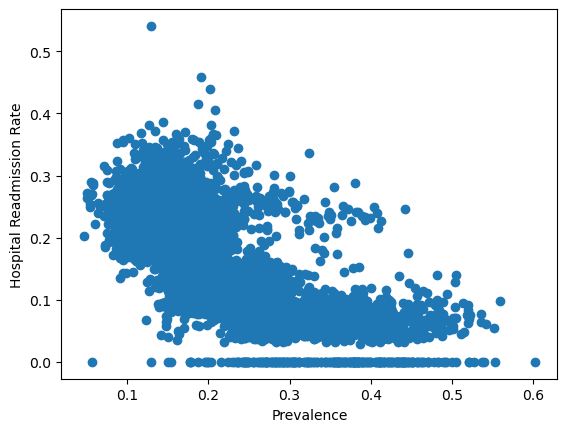

In [26]:
# Relationship between Prevalence and the rate of hospitalization for MCC
plt.scatter(mcc_state_df['Prevalence'], mcc_state_df['Hospital_Readmission_Rate'])
plt.xlabel('Prevalence')
plt.ylabel('Hospital Readmission Rate')
plt.show()

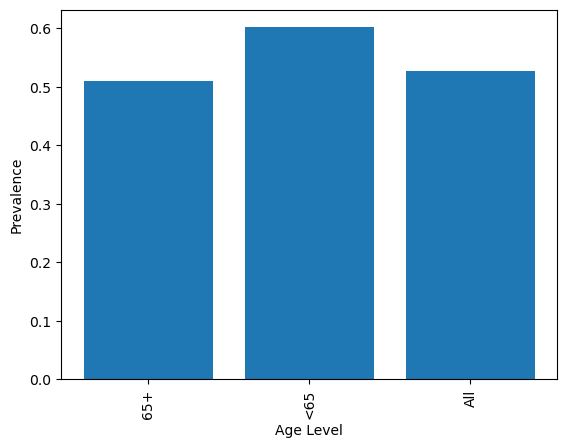

In [27]:
# The relationship of age and the prevalence of MCC
plt.bar(mcc_state_df['Beneficiary_Age_Level'], mcc_state_df['Prevalence'])
plt.xlabel("Age Level")
plt.xticks(rotation=90)
plt.ylabel("Prevalence")
plt.show()

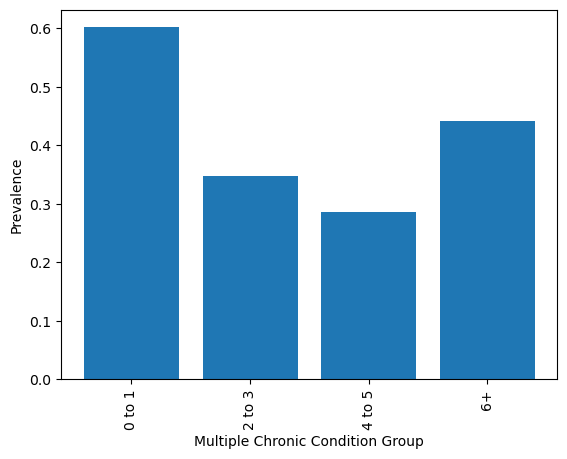

In [28]:
# Showing the relationship between the cases of MCC levels and prevalence of MCC
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'],mcc_state_df['Prevalence'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Prevalence")
plt.show()

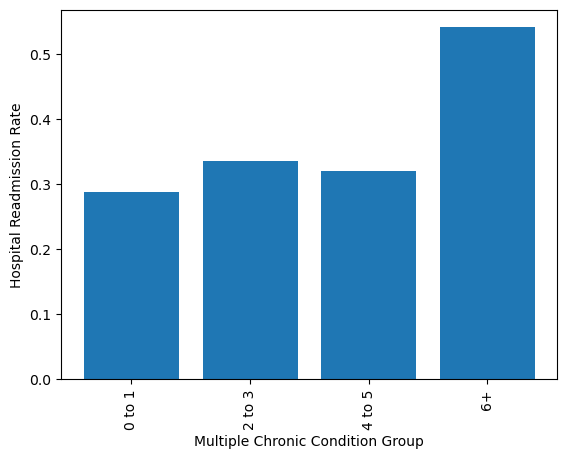

In [29]:
# Showing the relationship between the cases of MCC levels and Hospital_Readmission_Rate
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_state_df['Hospital_Readmission_Rate'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Hospital Readmission Rate")
plt.show()

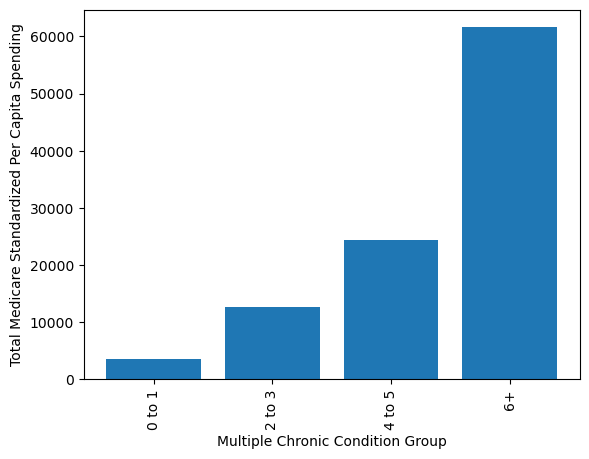

In [30]:
# Showing the relationship between the cases of MCC levels and Total_Medicare_Standardized_Per_Capita_Spending
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_state_df['Total_Medicare_Standardized_Per_Capita_Spending'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Total Medicare Standardized Per Capita Spending")
plt.show()

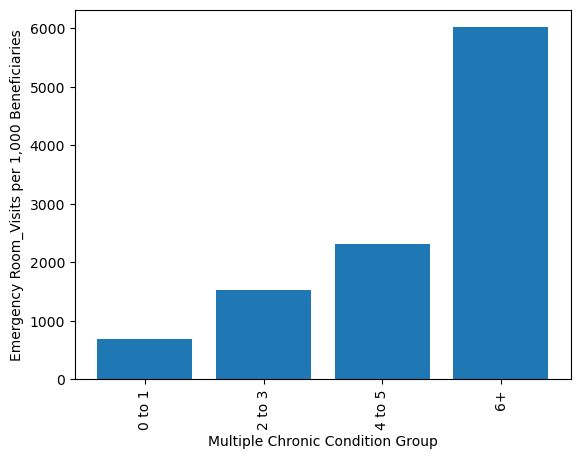

In [31]:
# Showing the relationship between the cases of MCC levels and Emergency_Room_Visits_per_1,000_Beneficiaries
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_state_df['Emergency_Room_Visits_per_1,000_Beneficiaries'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Emergency Room_Visits per 1,000 Beneficiaries")
plt.show()

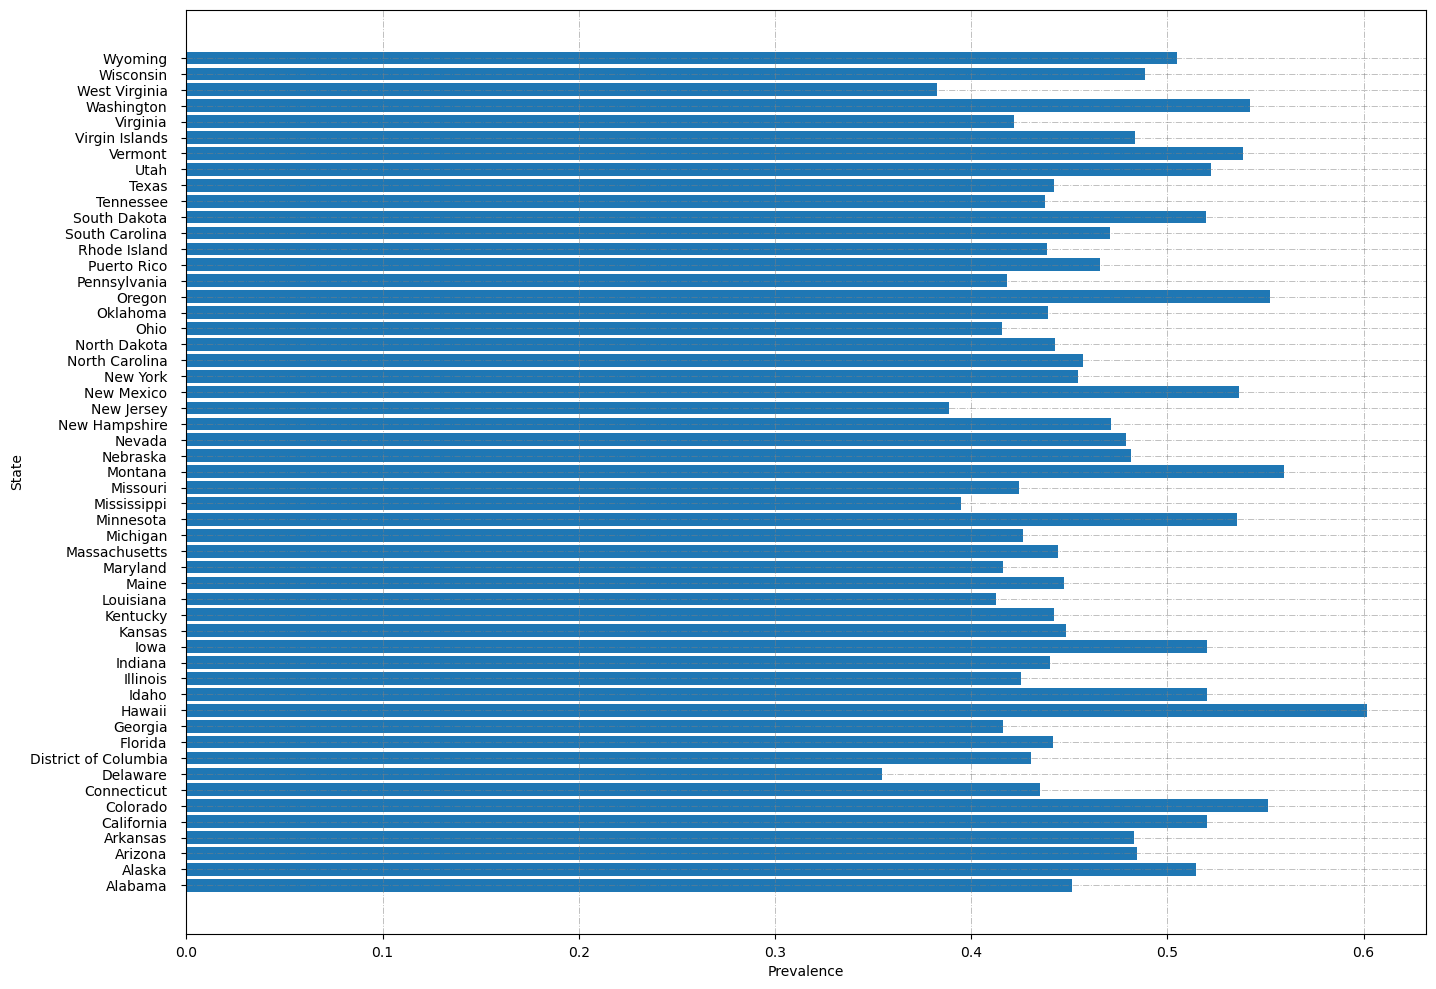

In [32]:
# Observing the prevalence vs state
fig, ax = plt.subplots(figsize =(16, 12))
 
# Horizontal Bar Plot
ax.barh(mcc_state_df["Beneficiary_Geographic_Description"], mcc_state_df["Prevalence"])

# Add axis labels
plt.xlabel("Prevalence")
plt.ylabel("State")

# Add gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.7,
        alpha = 0.5)
    
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

plt.show()

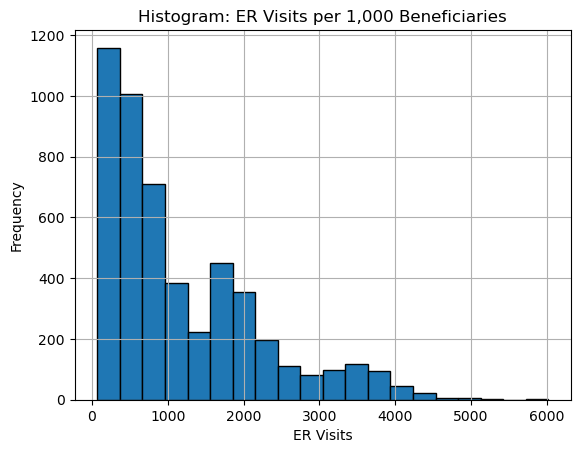

In [33]:
# Filter out negative values in the 'Emergency_Room_Visits_per_1,000_Beneficiaries' column
mcc_state_df_filtered = mcc_state_df[mcc_state_df['Emergency_Room_Visits_per_1,000_Beneficiaries'] >= 0]

# Create the histogram
plt.hist(mcc_state_df_filtered['Emergency_Room_Visits_per_1,000_Beneficiaries'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel("ER Visits")
plt.ylabel("Frequency")
plt.title("Histogram: ER Visits per 1,000 Beneficiaries")

# Add grid lines to the plot
plt.grid(True)

# Show the plot
plt.show()

### Observing the dataset at county level

In [34]:
# Make a dataframe based on County
mcc_county_df = mcc_df.loc[mcc_df["Beneficiary_Geographic_Level"] == "County"]
mcc_county_df = mcc_county_df.reset_index(drop=True)
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,County,Alabama : Autauga,01001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495
1,County,Alabama : Autauga,01001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187
2,County,Alabama : Autauga,01001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366
3,County,Alabama : Autauga,01001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177
4,County,Alabama : Baldwin,01003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382
...,...,...,...,...,...,...,...,...,...,...,...,...
38371,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831
38372,County,Wyoming : Weston,56045,65+,All,All,0 to 1,NaN,NaN,NaN,NaN,NaN
38373,County,Wyoming : Weston,56045,65+,All,All,2 to 3,NaN,NaN,NaN,NaN,NaN
38374,County,Wyoming : Weston,56045,65+,All,All,4 to 5,NaN,NaN,NaN,NaN,NaN


In [35]:
# creating a County column from the Beneficiary_Geographic_Description column
mcc_county_df["Beneficiary_Geographic_County"] = mcc_county_df["Beneficiary_Geographic_Description"].str.split(": ").str[1]
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County
0,County,Alabama : Autauga,01001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495,Autauga
1,County,Alabama : Autauga,01001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187,Autauga
2,County,Alabama : Autauga,01001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga
3,County,Alabama : Autauga,01001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga
4,County,Alabama : Baldwin,01003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382,Baldwin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831,Washakie
38372,County,Wyoming : Weston,56045,65+,All,All,0 to 1,NaN,NaN,NaN,NaN,NaN,Weston
38373,County,Wyoming : Weston,56045,65+,All,All,2 to 3,NaN,NaN,NaN,NaN,NaN,Weston
38374,County,Wyoming : Weston,56045,65+,All,All,4 to 5,NaN,NaN,NaN,NaN,NaN,Weston


In [36]:
# converting the datatype of Beneficiary_Geographic_Code
mcc_county_df["Beneficiary_Geographic_Code"] = mcc_county_df["Beneficiary_Geographic_Code"].apply(pd.to_numeric, errors='coerce')
mcc_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38376 entries, 0 to 38375
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     38376 non-null  object 
 1   Beneficiary_Geographic_Description               38376 non-null  object 
 2   Beneficiary_Geographic_Code                      38376 non-null  int64  
 3   Beneficiary_Age_Level                            38376 non-null  object 
 4   Beneficiary_Demographic_Level                    38376 non-null  object 
 5   Beneficiary_Demographic_Description              38376 non-null  object 
 6   Beneficiary_Multiple_Chronic_Condition_Group     38376 non-null  object 
 7   Prevalence                                       34992 non-null  float64
 8   Total_Medicare_Standardized_Per_Capita_Spending  34968 non-null  float64
 9   Total_Medicare_Per_Capita_Sp

In [37]:
# creating a State code from Beneficiary_Geographic_Code to merge with geojson data later
# Using floor division to extract the State code
mcc_county_df.loc[:,"State_Code"] = mcc_county_df["Beneficiary_Geographic_Code"] // 1000
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County,State_Code
0,County,Alabama : Autauga,1001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495,Autauga,1
1,County,Alabama : Autauga,1001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187,Autauga,1
2,County,Alabama : Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga,1
3,County,Alabama : Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga,1
4,County,Alabama : Baldwin,1003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382,Baldwin,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831,Washakie,56
38372,County,Wyoming : Weston,56045,65+,All,All,0 to 1,NaN,NaN,NaN,NaN,NaN,Weston,56
38373,County,Wyoming : Weston,56045,65+,All,All,2 to 3,NaN,NaN,NaN,NaN,NaN,Weston,56
38374,County,Wyoming : Weston,56045,65+,All,All,4 to 5,NaN,NaN,NaN,NaN,NaN,Weston,56


In [38]:
# Drop rows with blanks in the specified columns
columns_to_drop = ["Beneficiary_Geographic_Description", "Prevalence", \
                   "Total_Medicare_Standardized_Per_Capita_Spending", \
                   "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
                   "Emergency_Room_Visits_per_1,000_Beneficiaries"]

mcc_county_df.dropna(subset=columns_to_drop, inplace=True)
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County,State_Code
2,County,Alabama : Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga,1
3,County,Alabama : Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga,1
5,County,Alabama : Baldwin,1003,All,All,All,2 to 3,0.3072,5657.0170,5151.9363,0.0693,320.9799,Baldwin,1
6,County,Alabama : Baldwin,1003,All,All,All,4 to 5,0.2373,10472.4830,9474.2392,0.0969,613.3073,Baldwin,1
7,County,Alabama : Baldwin,1003,All,All,All,6+,0.1734,25754.3856,23004.7191,0.1997,1635.5744,Baldwin,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38352,County,Wyoming : Sweetwater,56037,65+,All,All,0 to 1,0.4934,1623.0430,1670.1786,0.0000,132.7078,Sweetwater,56
38354,County,Wyoming : Sweetwater,56037,65+,All,All,4 to 5,0.1316,12322.8094,14176.6202,0.0625,932.9983,Sweetwater,56
38355,County,Wyoming : Sweetwater,56037,65+,All,All,6+,0.1023,31649.2122,37866.9230,0.1723,2178.8793,Sweetwater,56
38363,County,Wyoming : Uinta,56041,65+,All,All,6+,0.0948,31017.7242,34515.9951,0.2330,1938.3886,Uinta,56


In [39]:
# Rearranging the columns of mcc_county_df
mcc_county_df = mcc_county_df[["Beneficiary_Geographic_Level", "Beneficiary_Geographic_Description", \
                               "State_Code", "Beneficiary_Geographic_County", "Beneficiary_Geographic_Code", \
                               "Beneficiary_Age_Level", "Beneficiary_Demographic_Level", \
                               "Beneficiary_Demographic_Description", "Beneficiary_Multiple_Chronic_Condition_Group", 
                               "Prevalence", "Total_Medicare_Standardized_Per_Capita_Spending", \
                               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
                               "Emergency_Room_Visits_per_1,000_Beneficiaries"]]
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,State_Code,Beneficiary_Geographic_County,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
2,County,Alabama : Autauga,1,Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366
3,County,Alabama : Autauga,1,Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177
5,County,Alabama : Baldwin,1,Baldwin,1003,All,All,All,2 to 3,0.3072,5657.0170,5151.9363,0.0693,320.9799
6,County,Alabama : Baldwin,1,Baldwin,1003,All,All,All,4 to 5,0.2373,10472.4830,9474.2392,0.0969,613.3073
7,County,Alabama : Baldwin,1,Baldwin,1003,All,All,All,6+,0.1734,25754.3856,23004.7191,0.1997,1635.5744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38352,County,Wyoming : Sweetwater,56,Sweetwater,56037,65+,All,All,0 to 1,0.4934,1623.0430,1670.1786,0.0000,132.7078
38354,County,Wyoming : Sweetwater,56,Sweetwater,56037,65+,All,All,4 to 5,0.1316,12322.8094,14176.6202,0.0625,932.9983
38355,County,Wyoming : Sweetwater,56,Sweetwater,56037,65+,All,All,6+,0.1023,31649.2122,37866.9230,0.1723,2178.8793
38363,County,Wyoming : Uinta,56,Uinta,56041,65+,All,All,6+,0.0948,31017.7242,34515.9951,0.2330,1938.3886


In [40]:
# converting State_Code and Beneficiary_Geographic_Code back to str object dtype
mcc_county_df["State_Code"] = mcc_county_df["State_Code"].apply(str)
mcc_county_df["Beneficiary_Geographic_Code"] = mcc_county_df["Beneficiary_Geographic_Code"].apply(str)

mcc_county_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,19140.000000,19140.000000,19140.000000,19140.000000,19140.000000
mean,0.230852,15866.754654,16246.791574,0.128757,1262.475271
std,0.082775,12150.545367,12724.760263,0.095124,1005.257503
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.174000,5301.468050,5250.345525,0.059000,433.333300
50%,0.221700,10925.232800,11043.774100,0.114300,881.037850
75%,0.281725,27865.564125,28181.933525,0.209200,1929.355850
max,0.612500,68435.491800,101756.822300,0.485100,6611.111100


In [41]:
mcc_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19140 entries, 2 to 38371
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     19140 non-null  object 
 1   Beneficiary_Geographic_Description               19140 non-null  object 
 2   State_Code                                       19140 non-null  object 
 3   Beneficiary_Geographic_County                    19140 non-null  object 
 4   Beneficiary_Geographic_Code                      19140 non-null  object 
 5   Beneficiary_Age_Level                            19140 non-null  object 
 6   Beneficiary_Demographic_Level                    19140 non-null  object 
 7   Beneficiary_Demographic_Description              19140 non-null  object 
 8   Beneficiary_Multiple_Chronic_Condition_Group     19140 non-null  object 
 9   Prevalence                  

In [42]:
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.head(100)

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
95,16015,0500000US16015,16,015,Boise,County,1899.237,"POLYGON ((-115.97577 43.59134, -116.12248 43.6..."
96,16021,0500000US16021,16,021,Boundary,County,1268.560,"POLYGON ((-117.03235 48.99919, -116.75719 48.9..."
97,16045,0500000US16045,16,045,Gem,County,560.900,"POLYGON ((-116.15710 44.49897, -116.15229 44.3..."
98,16051,0500000US16051,16,051,Jefferson,County,1093.501,"POLYGON ((-111.97683 43.92743, -111.98338 43.7..."


In [43]:
geoData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          3221 non-null   object  
 1   GEO_ID      3221 non-null   object  
 2   STATE       3221 non-null   object  
 3   COUNTY      3221 non-null   object  
 4   NAME        3221 non-null   object  
 5   LSAD        3221 non-null   object  
 6   CENSUSAREA  3221 non-null   float64 
 7   geometry    3221 non-null   geometry
dtypes: float64(1), geometry(1), object(6)
memory usage: 201.4+ KB


In [44]:
# add the json to into mcc_county dataset
merged_df = mcc_county_df.merge(geoData, left_on=["State_Code", "Beneficiary_Geographic_County"], right_on=["STATE","NAME"])

# we need to deal with pesky multipolygons
merged_df = merged_df.explode("geometry")
merged_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,State_Code,Beneficiary_Geographic_County,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,...,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,County,Delaware : Kent,10,Kent,10001,All,All,All,2 to 3,0.3164,...,0.0873,352.5022,10001,0500000US10001,10,001,Kent,County,586.179,"POLYGON ((-75.74767 39.14334, -75.75595 39.245..."
1,County,Delaware : Kent,10,Kent,10001,All,All,All,4 to 5,0.2734,...,0.0998,625.4763,10001,0500000US10001,10,001,Kent,County,586.179,"POLYGON ((-75.74767 39.14334, -75.75595 39.245..."
2,County,Delaware : Kent,10,Kent,10001,All,All,All,6+,0.1932,...,0.2298,1846.5133,10001,0500000US10001,10,001,Kent,County,586.179,"POLYGON ((-75.74767 39.14334, -75.75595 39.245..."
3,County,Delaware : Kent,10,Kent,10001,<65,All,All,2 to 3,0.2997,...,0.1767,792.5284,10001,0500000US10001,10,001,Kent,County,586.179,"POLYGON ((-75.74767 39.14334, -75.75595 39.245..."
4,County,Delaware : Kent,10,Kent,10001,<65,All,All,4 to 5,0.2123,...,0.1424,1161.0169,10001,0500000US10001,10,001,Kent,County,586.179,"POLYGON ((-75.74767 39.14334, -75.75595 39.245..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16825,County,Wyoming : Washakie,56,Washakie,56043,All,All,All,6+,0.0966,...,0.2863,3215.5689,56043,0500000US56043,56,043,Washakie,County,2238.549,"POLYGON ((-108.55076 44.07940, -108.55056 44.1..."
16826,County,Wyoming : Washakie,56,Washakie,56043,<65,All,All,4 to 5,0.1111,...,0.0000,2722.2222,56043,0500000US56043,56,043,Washakie,County,2238.549,"POLYGON ((-108.55076 44.07940, -108.55056 44.1..."
16827,County,Wyoming : Washakie,56,Washakie,56043,65+,All,All,6+,0.0983,...,0.2679,3116.8831,56043,0500000US56043,56,043,Washakie,County,2238.549,"POLYGON ((-108.55076 44.07940, -108.55056 44.1..."
16828,County,Nebraska : Jefferson,31,Jefferson,31095,<65,All,All,0 to 1,0.4946,...,0.0000,326.0870,31095,0500000US31095,31,095,Jefferson,County,570.185,"POLYGON ((-97.36920 40.00206, -97.36869 40.350..."


In [45]:
# Specifying the `total_bounds` 
merged_gdf = gpd.GeoDataFrame(merged_df)
bounds = merged_gdf.total_bounds
print(bounds)

# Check for valid geometries
print(merged_gdf.geometry.is_valid)

[-160.555771   18.917466  -66.949895   49.002357]
0        True
1        True
2        True
3        True
4        True
         ... 
16825    True
16826    True
16827    True
16828    True
16829    True
Length: 16830, dtype: bool


In [46]:
# Write county df to a csv file
merged_gdf.to_csv('mcc_county_merged_geometry.csv', index = False)

/Users/Shipra/anaconda3/envs/dev/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


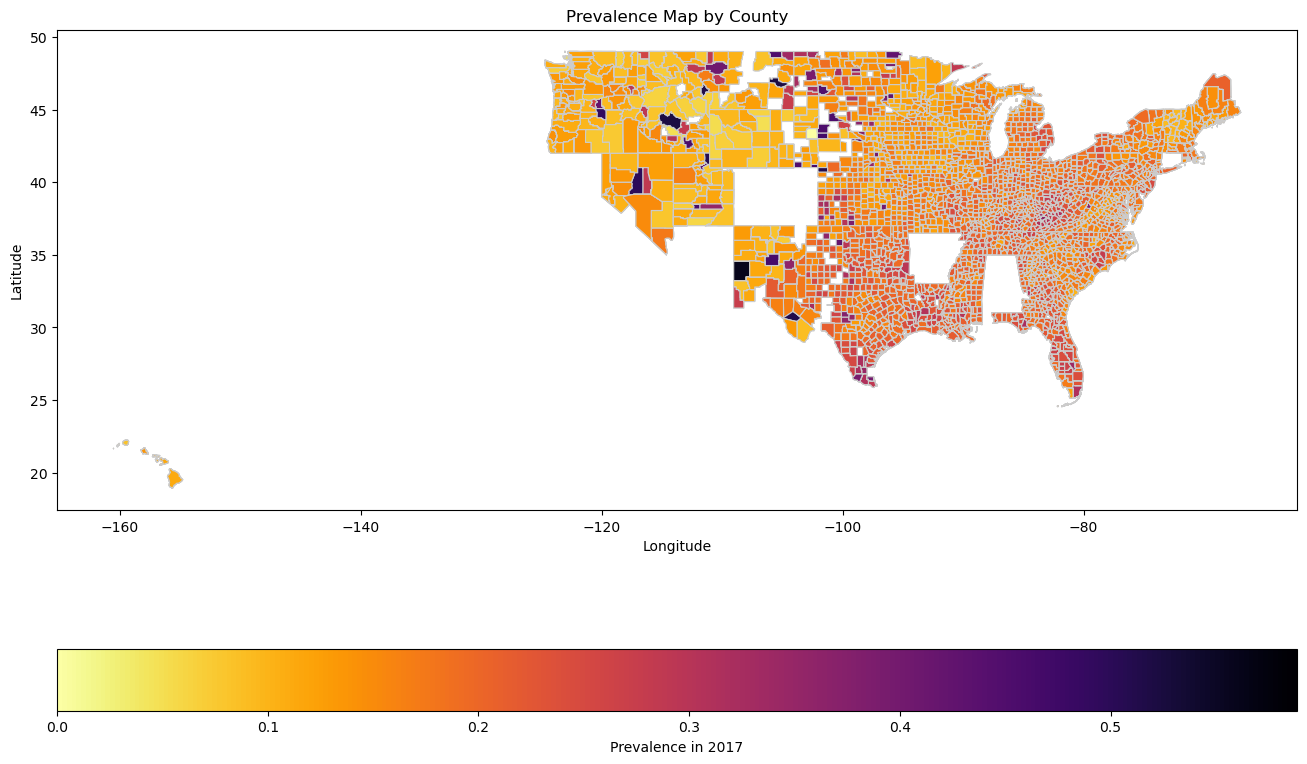

In [47]:
# Plot Prevalence on USA map
fig, ax = plt.subplots(figsize=(16, 12))

# Set the color map ('inferno_r' is just an example, you can choose other colormaps)
cmap = 'inferno_r'

# Plot the choropleth map using 'plot()' function of GeoDataFrame
merged_gdf.plot(column='Prevalence', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,\
               legend_kwds={"label": "Prevalence in 2017", "orientation": "horizontal"},)

# Customize the plot
ax.set_title('Prevalence Map by County')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

## References
https://www.statology.org/pandas-convert-object-to-float/

https://geopandas.org/en/stable/docs/user_guide/mapping.html
    